In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from desitarget.targetmask import desi_mask

In [3]:
def flux_to_mag(flux):
    mag = 22.5 - 2.5*np.log10(flux)
    return mag

In [4]:
def cut(ramin, ramax, decmin, decmax, catalog):
    
    mask = np.logical_and(catalog['RA'] >= ramin, catalog['RA'] <= ramax)
    mask &= np.logical_and(catalog['DEC'] >= decmin, catalog['DEC'] <= decmax)
    cat = catalog[mask]
    print(len(cat))
    
    return cat

In [10]:
def get_mag_decals(df):
    
    df = df[(df['FLUX_R'] > 0) & (df['FLUX_G'] > 0) & (df['FLUX_Z'] > 0)]
    print('FLUX_[R,G,Z]>=0:',len(df))
    rmag =  flux_to_mag(df['FLUX_R']/df['MW_TRANSMISSION_R'])
    gmag = flux_to_mag(df['FLUX_G']/df['MW_TRANSMISSION_G'])
    zmag = flux_to_mag(df['FLUX_Z']/df['MW_TRANSMISSION_Z'])
    
    return gmag, rmag, zmag

In [46]:
def mag_hist_decals(df, BANDS, DEF, NAME):
    
    print('Full:',len(df))
    gmag, rmag, zmag = get_mag_decals(df)
    df = df[(df['FLUX_R'] > 0) & (df['FLUX_G'] > 0) & (df['FLUX_Z'] > 0)]
    mask_psf = df['TYPE'] == b'PSF '
    #mask_nopsf = df['TYPE'] != b'PSF '
    mask_rex = df['TYPE'] == b'REX '
    mask_dev = df['TYPE'] == b'DEV '
    mask_exp = df['TYPE'] == b'EXP '
    mask_comp = df['TYPE'] == b'COMP '
    
    bins = np.linspace(16, 24, 100)
    if BANDS == 'r':
        BAND = rmag
    if BANDS == 'g':
        BAND = gmag
    if BANDS == 'z':
        BAND = zmag

    plt.figure(figsize=(12, 7))
    
    if DEF == 'MAGS':
        plt.hist(BAND[(mask_rex)], bins=bins,label=r'%s, REX'%(BANDS), histtype='step', fill=False, linewidth=2.0)
        plt.hist(BAND[(mask_dev)], bins=bins,label=r'%s, DEV'%(BANDS), histtype='step', fill=False, linewidth=2.0)
        plt.hist(BAND[(mask_exp)], bins=bins,label=r'%s, EXP'%(BANDS), histtype='step', fill=False, linewidth=2.0)
        plt.hist(BAND[(mask_comp)], bins=bins,label=r'%s, COMP'%(BANDS), histtype='step', fill=False, linewidth=2.0)
        plt.hist(BAND[(mask_psf)], bins=bins,label=r'%s, PSF'%(BANDS), histtype='step', fill=False, linewidth=2.0)
        plt.hist(BAND, bins=bins,label=r'%s, All'%(BANDS), histtype='step', fill=False, linewidth=2.0, linestyle='--', color='black')
    
    if DEF == 'ALL':
        plt.hist(rmag, bins=bins,label=r'r, All', histtype='step', fill=False, linewidth=2.0, linestyle='-', color='red')
        plt.hist(gmag, bins=bins,label=r'g, All', histtype='step', fill=False, linewidth=2.0, linestyle='-', color='green')
        plt.hist(zmag, bins=bins,label=r'z, All', histtype='step', fill=False, linewidth=2.0, linestyle='-', color='blue')
    #plt.xlim(16, 25)
    #plt.ylim(0, 1e5)
    plt.title(NAME)
    plt.xlabel('mag')
    plt.legend()
    plt.grid()

### Loading DECaLS DR7

In [7]:
columns0 = ['RA', 'DEC', 'TYPE', 'DESI_TARGET', 'BRIGHTSTARINBLOB', 'NOBS_G', 'NOBS_R', 'NOBS_Z', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'MW_TRANSMISSION_G', 'MW_TRANSMISSION_R','MW_TRANSMISSION_Z']
cat0 = fitsio.read('targets-dr7.1-0.23.0.fits', columns=columns0)
print('# Objects:', len(cat0))

# Objects: 72660205


Creating a sample region:

200 $\leq$ RA $\leq$ 230

-2 $\leq$ DEC $\leq$ +5

In [ ]:
cat0S = cut(200, 230, -2,5, cat0)

Full: 72660205
FLUX_[R,G,Z]>=0: 69521036


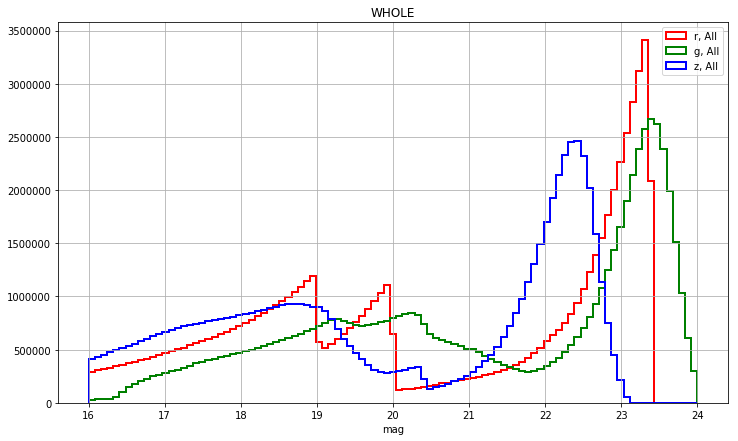

In [47]:
mag_hist_decals(cat0, 'r', 'ALL', 'WHOLE')

Full: 1557493
FLUX_[R,G,Z]>=0: 1554588


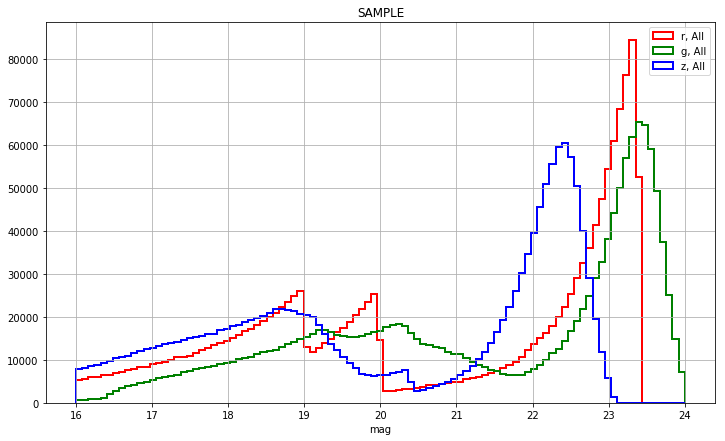

In [49]:
mag_hist_decals(cat0S, 'r', 'ALL', 'SAMPLE')

Full: 72660205
FLUX_[R,G,Z]>=0: 69521036


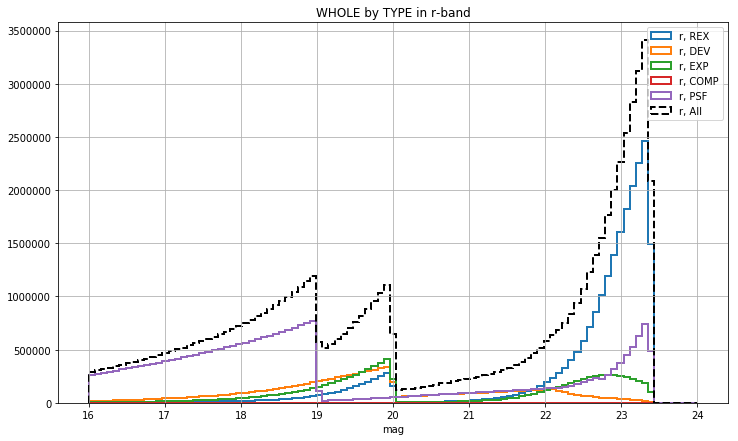

In [50]:
mag_hist_decals(cat0, 'r', 'MAGS', 'WHOLE by TYPE in r-band')

Full: 1557493
FLUX_[R,G,Z]>=0: 1554588


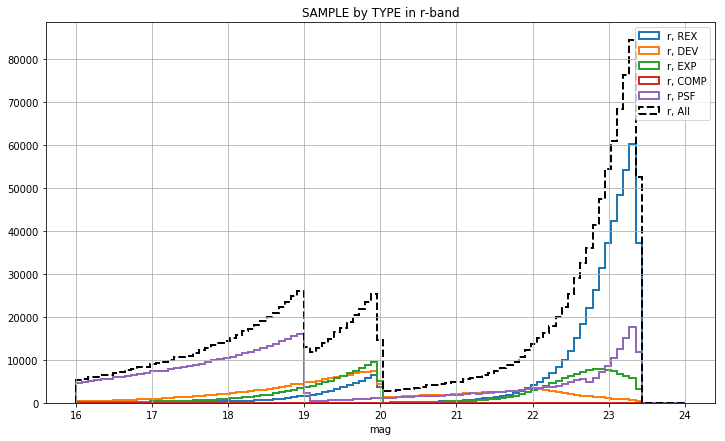

In [51]:
mag_hist_decals(cat0S, 'r', 'MAGS', 'SAMPLE by TYPE in r-band')

Full: 72660205
FLUX_[R,G,Z]>=0: 69521036


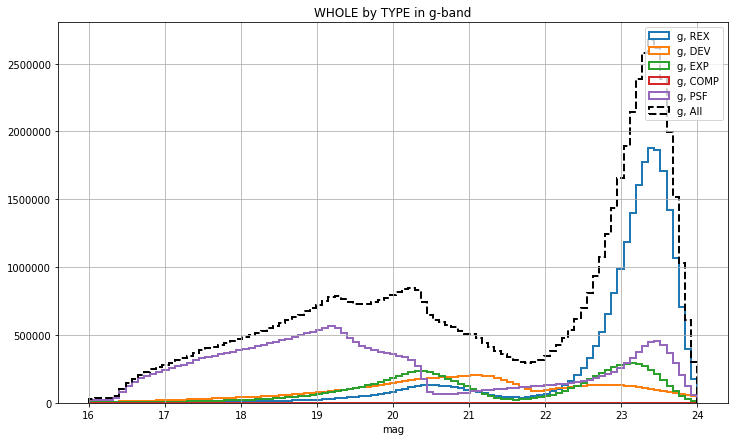

In [52]:
mag_hist_decals(cat0, 'g', 'MAGS', 'WHOLE by TYPE in g-band')

Full: 1557493
FLUX_[R,G,Z]>=0: 1554588


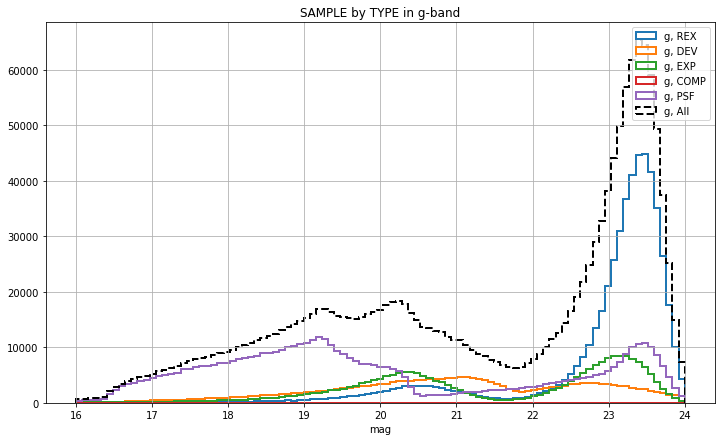

In [53]:
mag_hist_decals(cat0S, 'g', 'MAGS', 'SAMPLE by TYPE in g-band')

Full: 72660205
FLUX_[R,G,Z]>=0: 69521036


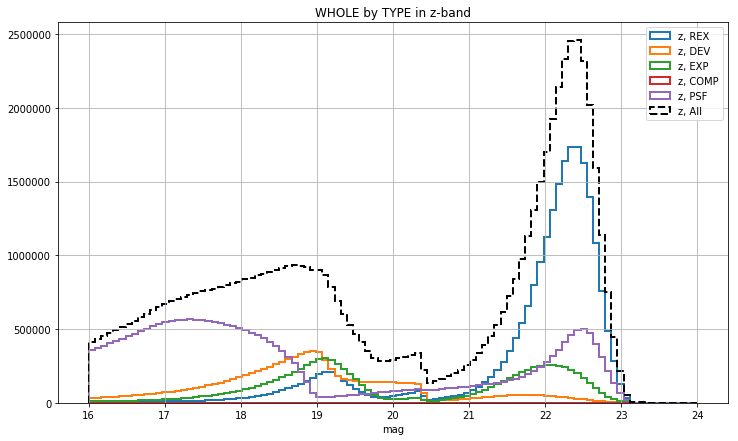

In [54]:
mag_hist_decals(cat0, 'z', 'MAGS', 'WHOLE by TYPE in z-band')

Full: 1557493
FLUX_[R,G,Z]>=0: 1554588


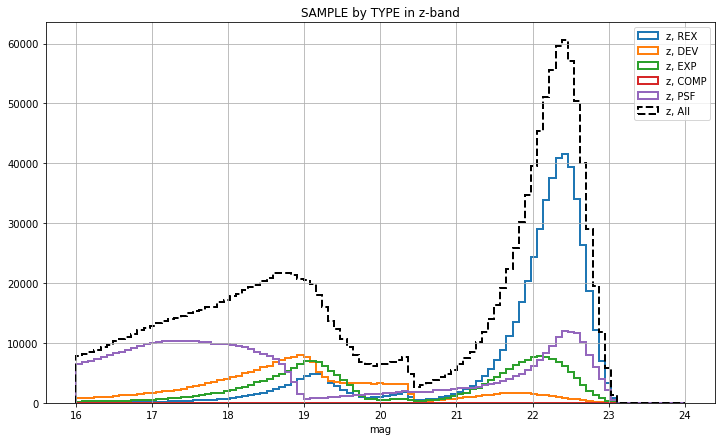

In [55]:
mag_hist_decals(cat0S, 'z', 'MAGS', 'SAMPLE by TYPE in z-band')